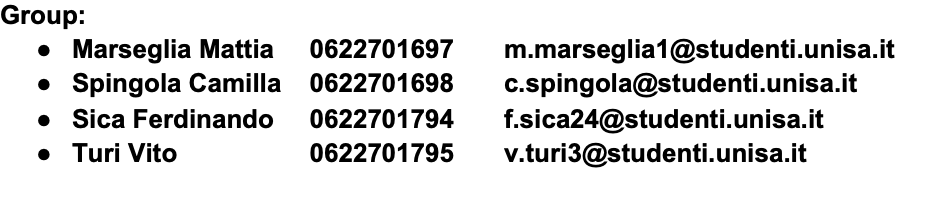

In [ ]:
#necessario per far funzionare cuda su colab!
!lsb_release --all
!nvcc --version
!nvidia-smi 
!pip install git+git://github.com/andreinechaev/nvcc4jupyter.git
%load_ext nvcc_plugin
!apt-get --purge remove cuda nvidia* libnvidia-*
!dpkg -l | grep cuda- | awk '{print $2}' | xargs -n1 dpkg --purge
!apt-get remove cuda-*
!apt autoremove
!apt-get update
!wget https://developer.nvidia.com/compute/cuda/9.2/Prod/local_installers/cuda-repo-ubuntu1710-9-2-local_9.2.88-1_amd64 -O cuda-repo-ubuntu1710-9-2-local_9.2.88-1_amd64.deb
!dpkg -i cuda-repo-ubuntu1710-9-2-local_9.2.88-1_amd64.deb
!apt-key add /var/cuda-repo-9-2-local/7fa2af80.pub
!apt-get update
!apt-get install cuda-9.2
!nvcc --version

In [ ]:
%%cu

#include <stdio.h>
#include <stdlib.h>

void deviceQuery()
{
  cudaDeviceProp prop;
  int nDevices=0, i;
  cudaError_t ierr;

  ierr = cudaGetDeviceCount(&nDevices);
  if (ierr != cudaSuccess) { printf("Sync error: %s\n", cudaGetErrorString(ierr)); }



  for( i = 0; i < nDevices; ++i )
  {
     ierr = cudaGetDeviceProperties(&prop, i);
     printf("Device number: %d\n", i);
     printf("  Device name: %s\n", prop.name);
     printf("  Compute capability: %d.%d\n\n", prop.major, prop.minor);
     
     printf("  Clock Rate: %d kHz\n", prop.clockRate);
     printf("  Total SMs: %d \n", prop.multiProcessorCount);
     printf("  Shared Memory Per SM: %lu bytes\n", prop.sharedMemPerMultiprocessor);
     printf("  Registers Per SM: %d 32-bit\n", prop.regsPerMultiprocessor);
     printf("  Max threads per SM: %d\n", prop.maxThreadsPerMultiProcessor);
     printf("  L2 Cache Size: %d bytes\n", prop.l2CacheSize);
     printf("  Total Global Memory: %lu bytes\n", prop.totalGlobalMem);
     printf("  Memory Clock Rate: %d kHz\n\n", prop.memoryClockRate);
     
     
     printf("  Max threads per block: %d\n", prop.maxThreadsPerBlock);
     printf("  Max threads in X-dimension of block: %d\n", prop.maxThreadsDim[0]);
     printf("  Max threads in Y-dimension of block: %d\n", prop.maxThreadsDim[1]);
     printf("  Max threads in Z-dimension of block: %d\n\n", prop.maxThreadsDim[2]);

     printf("  Max blocks in X-dimension of grid: %d\n", prop.maxGridSize[0]);
     printf("  Max blocks in Y-dimension of grid: %d\n", prop.maxGridSize[1]);
     printf("  Max blocks in Z-dimension of grid: %d\n\n", prop.maxGridSize[2]);     
     
     printf("  Shared Memory Per Block: %lu bytes\n", prop.sharedMemPerBlock);
     printf("  Registers Per Block: %d 32-bit\n", prop.regsPerBlock);
     printf("  Warp size: %d\n\n", prop.warpSize);

  }
}

int main() {
    deviceQuery();
}

Use to verify the assigned GPU.

In [ ]:
!nvidia-smi 

In [ ]:
!cat /proc/cpuinfo

In [ ]:
!cat /proc/meminfo

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

To calculate the BandWidth

In [ ]:
%cd /usr/local/cuda/samples
%cd 1_Utilities/bandwidthTest/
!make
!./bandwidthTest --mode-range --start=1000 --end=1000000 --increment=100000

To Calculate the GIPS of our GPU/Code
This is for Global Memory Algorithm

In [ ]:
MYSIZE = [8192*12*12, 8192*12*12*12]
MYBLOCKSIZE = [8*8,16*16,32*32]
MAXDIGIT = [9999, 99999999]
%cd /content/gdrive/MyDrive/Cuda/projectGruppo12

for size in MYSIZE:
   for maxdigit in MAXDIGIT:
     for blocksize in MYBLOCKSIZE:
      !nvcc -o Global.exe -DSIZE=$size -DMAX_DIGIT=$maxdigit -DBLOCKSIZE=$blocksize Global.cu
      !nvprof --metrics inst_integer ./Global.exe


The results of nvprof need to be inserted in "Istr" list in order (like the excel).

In [ ]:
MYSIZE = [8192*12*12, 8192*12*12*12]
MYBLOCKSIZE = [8*8,16*16,32*32]
MAXDIGIT = [9999, 99999999]
Istr = [523276190, 529837263, 536829076, 811706561, 817998057, 82492481, 6279437849, 6358059902,6441414983,6279437849,9815978753,989525097 ]
%cd /content/gdrive/MyDrive/Cuda/projectGruppo12
i = 0 

for size in MYSIZE:
   for maxdigit in MAXDIGIT:
     for blocksize in MYBLOCKSIZE:
      value = Istr[i]/1000/1000/1000
      i+=1
      !nvcc -o Global.exe -DSIZE=$size -DMAX_DIGIT=$maxdigit -DBLOCKSIZE=$blocksize -DGIPS=$value Global.cu
      for _ in range(50):
        !./Global.exe




To Calculate the GIPS of our GPU/Code
This is for Shared Memory Algorithm

In [ ]:
MYSIZE = [8192*12*12, 8192*12*12*12]
MYBLOCKSIZE = [8*8,16*16,32*32]
MAXDIGIT = [9999, 99999999]
%cd /content/gdrive/MyDrive/Cuda/projectGruppo12

for size in MYSIZE:
   for maxdigit in MAXDIGIT:
     for blocksize in MYBLOCKSIZE:
      !nvcc -o Shared.exe -DSIZE=$size -DMAX_DIGIT=$maxdigit -DBLOCKSIZE=$blocksize Shared.cu
      !nvprof --metrics inst_integer ./Shared.exe


The results of nvprof need to be inserted in "Istr" list in order (like the excel).

In [ ]:
MYSIZE = [8192*12*12, 8192*12*12*12]
MYBLOCKSIZE = [8*8,16*16,32*32]
MAXDIGIT = [9999, 99999999]
Istr = [486599831, 492551621, 499388227, 756432316, 763300412, 769972724, 5839324827, 5910651136, 5992175076, 9095996828, 9159609860, 9239198644]
%cd /content/gdrive/MyDrive/Cuda/projectGruppo12
i = 0 

for size in MYSIZE:
   for maxdigit in MAXDIGIT:
     for blocksize in MYBLOCKSIZE:
      value = Istr[i]/1000/1000/1000
      i+=1
      !nvcc -o Shared.exe -DSIZE=$size -DMAX_DIGIT=$maxdigit -DBLOCKSIZE=$blocksize -DGIPS=$value Shared.cu
      for _ in range(50):
        !./Shared.exe




To Calculate the GIPS of our GPU/Code
This is for Texture Memory Algorithm

In [ ]:
MYSIZE = [8192*12*12, 8192*12*12*12]
MYBLOCKSIZE = [8*8,16*16,32*32]
MAXDIGIT = [9999, 99999999]
%cd /content/gdrive/MyDrive/Cuda/projectGruppo12

for size in MYSIZE:
   for maxdigit in MAXDIGIT:
     for blocksize in MYBLOCKSIZE:
      !nvcc -o Texture.exe -DSIZE=$size -DMAX_DIGIT=$maxdigit -DBLOCKSIZE=$blocksize Texture.cu
      !nvprof --metrics inst_integer ./Texture.exe


The results of nvprof need to be inserted in "Istr" list in order (like the excel).

In [ ]:
MYSIZE = [8192*12*12, 8192*12*12*12]
MYBLOCKSIZE = [8*8,16*16,32*32]
MAXDIGIT = [9999, 99999999]
Istr = [457109656, 463061256, 469895142, 709245236,  714556780, 721230516, 5485428127, 5556753781, 5638278216, 8511079276, 8574682980, 8654283060]
%cd /content/gdrive/MyDrive/Cuda/projectGruppo12
i = 0 

for size in MYSIZE:
   for maxdigit in MAXDIGIT:
     for blocksize in MYBLOCKSIZE:
      value = Istr[i]/1000/1000/1000
      i+=1
      !nvcc -o Texture.exe -DSIZE=$size -DMAX_DIGIT=$maxdigit -DBLOCKSIZE=$blocksize -DGIPS=$value Texture.cu
      for _ in range(50):
        !./Texture.exe




To Calculate the GIPS of our GPU/Code
This is for Streams Global Memory Algorithm

In [ ]:
MYSIZE = [8192*12*12, 8192*12*12*12]
MYBLOCKSIZE = [8*8,16*16,32*32]
MAXDIGIT = [9999, 99999999]
%cd /content/gdrive/MyDrive/Cuda/projectGruppo12

for size in MYSIZE:
   for maxdigit in MAXDIGIT:
     for blocksize in MYBLOCKSIZE:
      !nvcc -o StreamsGlobal.exe -DSIZE=$size -DMAX_DIGIT=$maxdigit -DBLOCKSIZE=$blocksize StreamsGlobal.cu
      !nvprof --metrics inst_integer ./StreamsGlobal.exe


The results of nvprof need to be inserted in "Istr" list in order (like the excel).

In [ ]:
MYSIZE = [8192*12*12, 8192*12*12*12]
MYBLOCKSIZE = [8*8,16*16,32*32]
MAXDIGIT = [9999, 99999999]
Istr = [362589875, 366006723, 339721746, 554608457, 555869193, 509580240, 3993652278, 4391982067, 4465898123, 6079699440, 6670254217, 6737698121]
%cd /content/gdrive/MyDrive/Cuda/projectGruppo12
i = 0 

for size in MYSIZE:
   for maxdigit in MAXDIGIT:
     for blocksize in MYBLOCKSIZE:
      value = Istr[i]/1000/1000/1000
      i+=1
      !nvcc -o StreamsGlobal.exe -DSIZE=$size -DMAX_DIGIT=$maxdigit -DBLOCKSIZE=$blocksize -DGIPS=$value StreamsGlobal.cu
      for _ in range(50):
        !./StreamsGlobal.exe




To Calculate the GIPS of our GPU/Code
This is for Streams Shared Memory Algorithm

In [ ]:
MYSIZE = [8192*12*12, 8192*12*12*12]
MYBLOCKSIZE = [8*8,16*16,32*32]
MAXDIGIT = [9999, 99999999]
%cd /content/gdrive/MyDrive/Cuda/projectGruppo12

for size in MYSIZE:
   for maxdigit in MAXDIGIT:
     for blocksize in MYBLOCKSIZE:
      !nvcc -o StreamsShared.exe -DSIZE=$size -DMAX_DIGIT=$maxdigit -DBLOCKSIZE=$blocksize StreamsShared.cu
      !nvprof --metrics inst_integer ./StreamsShared.exe


The results of nvprof need to be inserted in "Istr" list in order (like the excel).

In [ ]:
MYSIZE = [8192*12*12, 8192*12*12*12]
MYBLOCKSIZE = [8*8,16*16,32*32]
MAXDIGIT = [9999, 99999999]
Istr = [291368426, 293345226, 299187122, 444061484, 443012460, 448098572, 3496441462, 3520074886, 3589672886, 5328699724, 5316001324, 5974770194]
%cd /content/gdrive/MyDrive/Cuda/projectGruppo12
i = 0 

for size in MYSIZE:
   for maxdigit in MAXDIGIT:
     for blocksize in MYBLOCKSIZE:
      value = Istr[i]/1000/1000/1000
      i+=1
      !nvcc -o StreamsShared.exe -DSIZE=$size -DMAX_DIGIT=$maxdigit -DBLOCKSIZE=$blocksize -DGIPS=$value StreamsShared.cu
      for _ in range(50):
        !./StreamsShared.exe




To Calculate the GIPS of our GPU/Code
This is for Streams Texture Memory Algorithm

In [ ]:
MYSIZE = [8192*12*12, 8192*12*12*12]
MYBLOCKSIZE = [8*8,16*16,32*32]
MAXDIGIT = [9999, 99999999]
%cd /content/gdrive/MyDrive/Cuda/projectGruppo12

for size in MYSIZE:
   for maxdigit in MAXDIGIT:
     for blocksize in MYBLOCKSIZE:
      !nvcc -o StreamsTexture.exe -DSIZE=$size -DMAX_DIGIT=$maxdigit -DBLOCKSIZE=$blocksize StreamsTexture.cu
      !nvprof --metrics inst_integer ./StreamsTexture.exe


The results of nvprof need to be inserted in "Istr" list in order (like the excel).

In [ ]:
MYSIZE = [8192*12*12, 8192*12*12*12]
MYBLOCKSIZE = [8*8,16*16,32*32]
MAXDIGIT = [9999, 99999999]
Istr = [285468746, 287447766, 293289242, 436180460, 435133068, 440217644, 3413986462, 3449293066, 3518896166, 5215456396, 5221440172, 5281961228]
%cd /content/gdrive/MyDrive/Cuda/projectGruppo12
i = 0 

for size in MYSIZE:
   for maxdigit in MAXDIGIT:
     for blocksize in MYBLOCKSIZE:
      value = Istr[i]/1000/1000/1000
      i+=1
      !nvcc -o StreamsTexture.exe -DSIZE=$size -DMAX_DIGIT=$maxdigit -DBLOCKSIZE=$blocksize -DGIPS=$value StreamsTexture.cu
      for _ in range(50):
        !./StreamsTexture.exe




**TESTING SECTIONS**

TEST GLOBAL MEMORY ALGORITHMS

In [ ]:
%cd /content/gdrive/MyDrive/Cuda/projectGruppo12

!nvcc -o Global.exe -DSIZE=8192*12*12 -DBLOCKSIZE=256 -DMAX_DIGIT=9999 Global.cu 
!./Global.exe
!nvcc -o Global.exe -DSIZE=8192*12*12 -DBLOCKSIZE=256 -DMAX_DIGIT=9999 -DTEST=1 Global.cu 
!./Global.exe

TEST SHARED MEMORY ALGORITHMS

In [ ]:
%cd /content/gdrive/MyDrive/Cuda/projectGruppo12

!nvcc -o Shared.exe -DSIZE=8192*12*12 -DBLOCKSIZE=256 -DMAX_DIGIT=9999 Shared.cu 
!./Shared.exe
!nvcc -o Shared.exe -DSIZE=8192*12*12 -DBLOCKSIZE=256 -DMAX_DIGIT=9999 -DTEST=1 Shared.cu 
!./Shared.exe

TEST TEXTURE MEMORY ALGORITHMS

In [ ]:
%cd /content/gdrive/MyDrive/Cuda/projectGruppo12

!nvcc -o Texture.exe -DSIZE=8192*12*12 -DBLOCKSIZE=256 -DMAX_DIGIT=9999 Texture.cu 
!./Texture.exe
!nvcc -o Texture.exe -DSIZE=8192*12*12 -DBLOCKSIZE=256 -DMAX_DIGIT=9999 -DTEST=1 Texture.cu 
!./Texture.exe

TEST STREAMS GLOBAL MEMORY ALGORITHMS

In [ ]:
%cd /content/gdrive/MyDrive/Cuda/projectGruppo12

!nvcc -o StreamsGlobal.exe -DSIZE=8192*12*12 -DBLOCKSIZE=256 -DMAX_DIGIT=9999 StreamsGlobal.cu 
!./StreamsGlobal.exe
!nvcc -o StreamsGlobal.exe -DSIZE=8192*12*12 -DBLOCKSIZE=256 -DMAX_DIGIT=9999 -DTEST=1 StreamsGlobal.cu 
!./StreamsGlobal.exe

TEST STREAMS SHARED MEMORY ALGORITHMS

In [ ]:
%cd /content/gdrive/MyDrive/Cuda/projectGruppo12

!nvcc -o StreamsShared.exe -DSIZE=8192*12*12 -DBLOCKSIZE=256 -DMAX_DIGIT=9999 StreamsShared.cu 
!./StreamsShared.exe
!nvcc -o StreamsShared.exe -DSIZE=8192*12*12 -DBLOCKSIZE=256 -DMAX_DIGIT=9999 -DTEST=1 StreamsShared.cu 
!./StreamsShared.exe

TEST STREAMS TEXTURE MEMORY ALGORITHMS

In [ ]:
%cd /content/gdrive/MyDrive/Cuda/projectGruppo12

!nvcc -o StreamsTexture.exe -DSIZE=8192*12*12 -DBLOCKSIZE=256 -DMAX_DIGIT=9999 StreamsTexture.cu 
!./StreamsTexture.exe
!nvcc -o StreamsTexture.exe -DSIZE=8192*12*12 -DBLOCKSIZE=256 -DMAX_DIGIT=9999 -DTEST=1 StreamsTexture.cu 
!./StreamsTexture.exe